William Thompson 1152991182

(a) Loading in packages/data set, set up data frame for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.io import arff

%matplotlib inline

In [2]:
headers=['PelvicIncidence','PelvicTilt','LumbarLordosisAngle','SacralSlope','PelvicRadius','GradeSpond','Class']
df = pd.read_csv('vertebral_column_data/column_2C.dat', header=None, delimiter = " ", names=headers)
df.info()

df[df.columns[6:7]] = df[df.columns[6:7]].eq('AB').mul(1)

display(df)


x = df[df.columns[0:6]]
y = df[df.columns[6:7]]




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PelvicIncidence      310 non-null    float64
 1   PelvicTilt           310 non-null    float64
 2   LumbarLordosisAngle  310 non-null    float64
 3   SacralSlope          310 non-null    float64
 4   PelvicRadius         310 non-null    float64
 5   GradeSpond           310 non-null    float64
 6   Class                310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,GradeSpond,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


(b) Pre-Processing and Exploratory data analysis:

i.Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

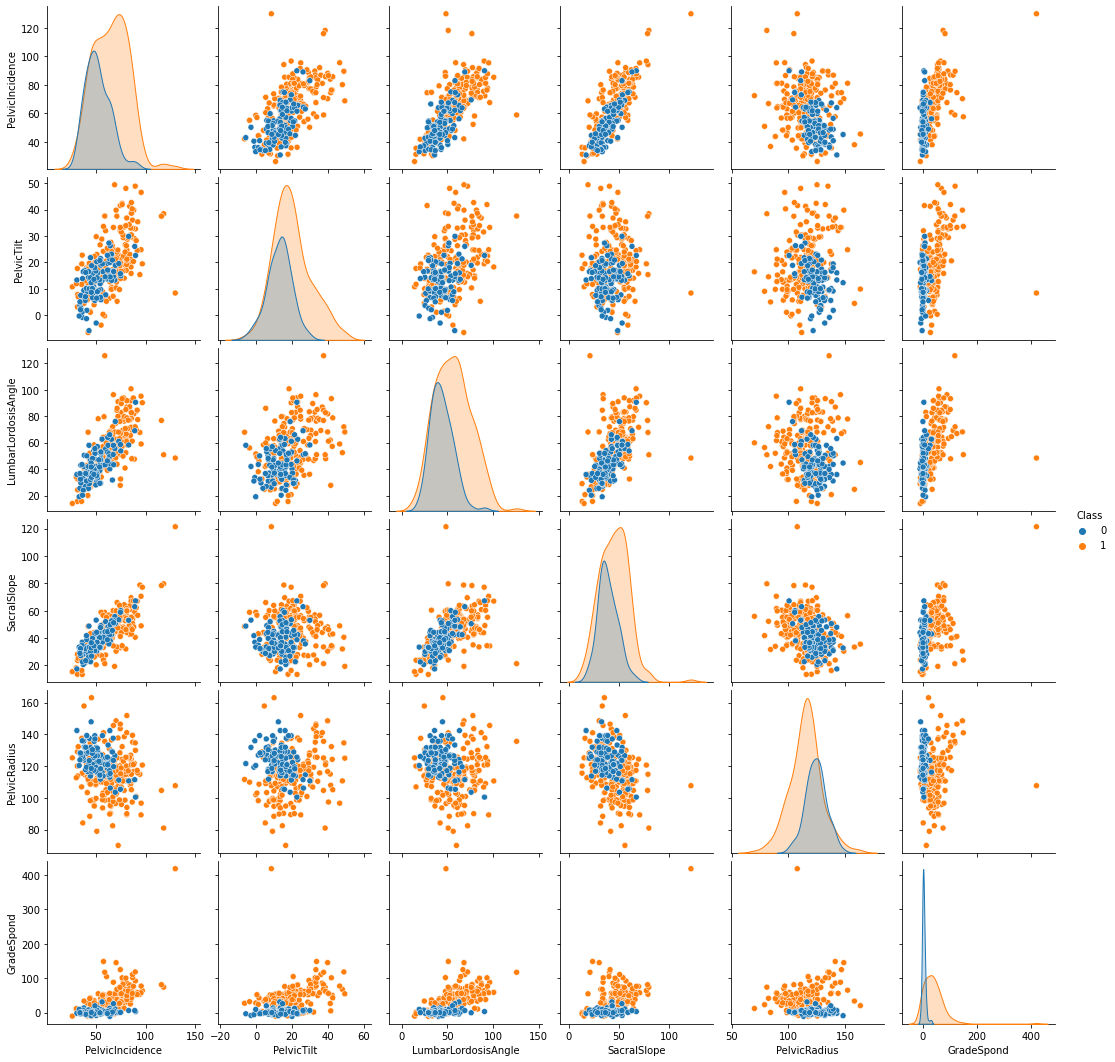

In [3]:
import seaborn as sns
sns.pairplot(df, hue='Class')

ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).

<AxesSubplot:xlabel='Class', ylabel='PelvicIncidence'>

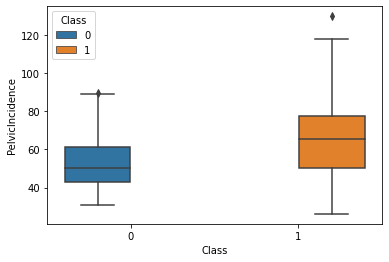

In [4]:
# Pelvic Incidence
sns.boxplot(x=df['Class'], y=df['PelvicIncidence'], hue=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='PelvicTilt'>

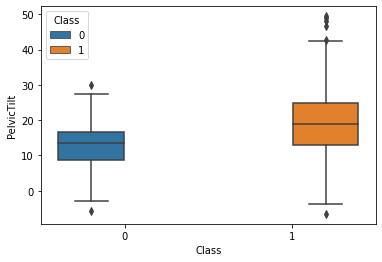

In [5]:
# Pelvic Tilt
sns.boxplot(x=df['Class'], y=df['PelvicTilt'], hue=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='LumbarLordosisAngle'>

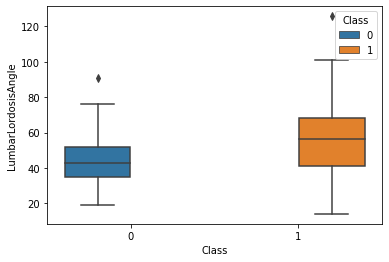

In [6]:
# Lumbar Lordosis Angle
sns.boxplot(x=df['Class'], y=df['LumbarLordosisAngle'], hue=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='SacralSlope'>

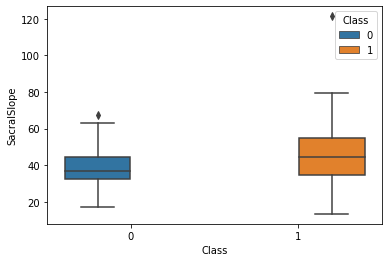

In [7]:
# Sacral Slope
sns.boxplot(x=df['Class'], y=df['SacralSlope'], hue=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='PelvicRadius'>

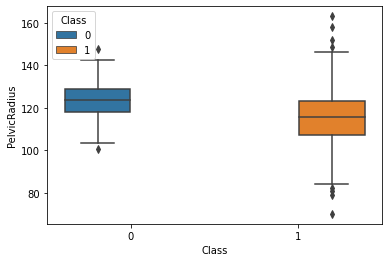

In [8]:
# Pelvic Radius
sns.boxplot(x=df['Class'], y=df['PelvicRadius'], hue=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='GradeSpond'>

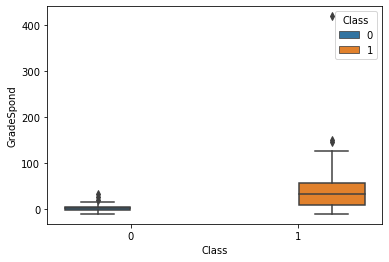

In [9]:
# Grade of Spondylolisthesis
sns.boxplot(x=df['Class'], y=df['GradeSpond'], hue=df['Class'])

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [10]:
# pd.set_option('display.max_rows', none)
# print(df)
# first 70 rows of class 0: row 210 to 279
# first 140 rows of class 1: row 0 to 139


#class 0 and 1
allClass0 = df[df['Class'] == 0]
allClass1 = df[df['Class'] == 1]


#class 0 test and train for all columns
class0Training = allClass0.head(70)
class0Test = allClass0.loc[280:309, :]


#class 1 test and train for all columns
class1Training = allClass1.head(140)
class1Test = allClass1.loc[140:209, :]


#Intermediary steps, separating columns
#Train
# xtr0 = class0Training[class0Training[0:6]]
xtr0 = class0Training[['PelvicIncidence','PelvicTilt','LumbarLordosisAngle','SacralSlope','PelvicRadius','GradeSpond']]
# xtr1 = class1Training[class1Training[0:6]]
xtr1 = class1Training[['PelvicIncidence','PelvicTilt','LumbarLordosisAngle','SacralSlope','PelvicRadius','GradeSpond']]


# ytr0 = class0Training[class0Training[6:7]]
ytr0 = class0Training['Class']
# ytr1 = class1Training[class1Training[6:7]]
ytr1 = class1Training['Class']

#Test
# xte0 = class0Test[class0Test[0:6]]
xte0 = class0Test[['PelvicIncidence','PelvicTilt','LumbarLordosisAngle','SacralSlope','PelvicRadius','GradeSpond']]
# xte1 = class1Test[class1Test[0:6]]
xte1 = class1Test[['PelvicIncidence','PelvicTilt','LumbarLordosisAngle','SacralSlope','PelvicRadius','GradeSpond']]

# yte0 = class0Test[class0Test[6:7]]
yte0 = class0Test['Class']
# yte1 = class1Test[class1Test[6:7]]
yte1 = class1Test['Class']



#Combine
trainFramesX = [xtr0, xtr1]
X_Train = pd.concat(trainFramesX)
trainFramesY = [ytr0, ytr1]
Y_Train = pd.concat(trainFramesY)


#Separate X and Y frames for test data, combine
testFramesX = [xte0, xte1]
X_Test = pd.concat(testFramesX)
testFramesY = [yte0, yte1]
Y_Test = pd.concat(testFramesY)

print(X_Train, Y_Train, X_Test, Y_Test)


     PelvicIncidence  PelvicTilt  LumbarLordosisAngle  SacralSlope  \
210            38.51       16.96                35.11        21.54   
211            54.92       18.97                51.60        35.95   
212            44.36        8.95                46.90        35.42   
213            48.32       17.45                48.00        30.87   
214            45.70       10.66                42.58        35.04   
..               ...         ...                  ...          ...   
135            77.12       30.35                77.48        46.77   
136            88.02       39.84                81.77        48.18   
137            83.40       34.31                78.42        49.09   
138            72.05       24.70                79.87        47.35   
139            85.10       21.07                91.73        64.03   

     PelvicRadius  GradeSpond  
210        127.63        7.99  
211        125.85        2.00  
212        129.22        4.99  
213        128.98       -0.91  

(c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).

ii. Test all the data in the test database with knearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208,205, . . . ,7,4,1} (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? 

In [11]:
from sklearn.metrics import precision_recall_fscore_support
test_accuracies = []
train_accuracies = []
k = []


for i in range(208, 0, -3):
    classifier = KNeighborsClassifier(n_neighbors = i, metric='euclidean')
    classifier.fit(X_Train,Y_Train)
        
    Y_pred = classifier.predict(X_Test)
    test_accuracies.append(accuracy_score(Y_Test,Y_pred))
    
    Y_train_pred = classifier.predict(X_Train)
    train_accuracies.append(accuracy_score(Y_train_pred, Y_Train))
    
    k.append(i)
    

    

In [12]:
#finding k*
np.argmax(test_accuracies)
# print(test_accuracies)
# print(test_accuracies[68])
# returns index with highest accuracy, in this case 4

[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.72, 0.73, 0.76, 0.77, 0.8, 0.78, 0.85, 0.8, 0.84, 0.84, 0.86, 0.82, 0.86, 0.84, 0.85, 0.84, 0.83, 0.84, 0.86, 0.87, 0.88, 0.87, 0.88, 0.87, 0.88, 0.88, 0.88, 0.88, 0.89, 0.89, 0.88, 0.88, 0.9, 0.89, 0.89, 0.89, 0.9, 0.89, 0.9, 0.89, 0.91, 0.88, 0.9, 0.88, 0.94, 0.87]
0.94


Answer: k* = 4

[Text(0.5, 0, 'K Value'), Text(0, 0.5, 'Error')]

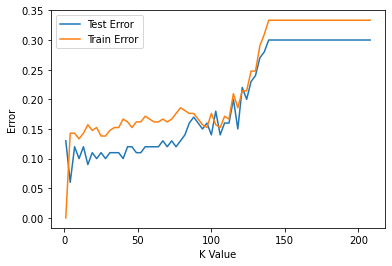

In [13]:
# Test errors
test_errors = []
for i in range(0, len(test_accuracies)):
    test_errors.append(1.0-test_accuracies[i])


# Train errors
train_errors = []
for i in range(0, len(train_accuracies)):
    train_errors.append(1.0-train_accuracies[i])


# df_errors = {'test_error' : test_errors, 'train_error' : train_errors}

plot = sns.lineplot(x=k, y=test_errors, label=str('Test Error'))
plot = sns.lineplot(x=k, y=train_errors, label=str('Train Error'))
plot.set(xlabel='K Value', ylabel='Error')




ii (cont). Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score



In [15]:
from sklearn.metrics import f1_score
classifier = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
classifier.fit(X_Train, Y_Train)


Y_pred = classifier.predict(X_Test)
f1_score(Y_Test, Y_pred, average=None)

array([0.89285714, 0.95833333])

In [16]:
cm = confusion_matrix(Y_Test, Y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

#https://en.wikipedia.org/wiki/Confusion_matrix
TPR = (TP)/(TP+FN)
TNR = (TN)/(TN+FP)
precision = (TP)/(TP+FP)

print("Confusion Matrix: \n", cm)
print("\nTrue Positive Rate: ", TPR)
print("True Negative Rate: ", TNR)
print("Precision: ", precision)



Confusion Matrix: 
 [[25  5]
 [ 1 69]]

True Positive Rate:  0.9857142857142858
True Negative Rate:  0.8333333333333334
Precision:  0.9324324324324325


iii.
Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 
Note: for each N, select your training set by choosing the first [N/3] rows of Class 0 and the first N − [N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

In [17]:
# pd.set_option('display.max_rows', 10)


In [18]:
import math

allClass0 = df[df['Class'] == 0]
allClass1 = df[df['Class'] == 1]


# Class 0 DFs
class0_X = allClass0[['PelvicIncidence','PelvicTilt','LumbarLordosisAngle','SacralSlope','PelvicRadius','GradeSpond']]
class0_Y = allClass0['Class']

# Class 1 DFs
class1_X = allClass1[['PelvicIncidence','PelvicTilt','LumbarLordosisAngle','SacralSlope','PelvicRadius','GradeSpond']]
class1_Y = allClass1['Class']



#for plotting
xAxis = []

#Best test errors
max_accuracies = []

#Initiated here for first instance
all_accuracies = []
best_test_error = None

my_creativity = 0


#Want to put bound at 211 to include 210, but then n/3 is thrown off
for n in range(10, 211, 10):
    
    if my_creativity > 0:
        best_test_error = np.argmax(all_accuracies)
        max_accuracies.append(all_accuracies[best_test_error])
    
    # X_Train: Combine first N/3 rows of class 0 with first N-[N/3] rows of class 1
    xLcTr0 = class0_X.loc[:][0:math.floor((n/3))]
    xLcTr1 = class1_X.loc[:][0:math.floor(1-(n/3))]
    LC_Train_Frames_X = [xLcTr0, xLcTr1]
    #final
    X_Train_LC = pd.concat(LC_Train_Frames_X)
    
    # Y_Train: Combine first N/3 rows of class 0 with first N-[N/3] rows of class 1
    yLcTr0 = class0_Y.loc[:][0:math.floor((n/3))]
    yLcTr1 = class1_Y.loc[:][0:math.floor(1-(n/3))]
    LC_Train_Frames_Y = [yLcTr0, yLcTr1]
    #final
    Y_Train_LC = pd.concat(LC_Train_Frames_Y)
    
    xAxis.append(n)
    
    all_accuracies = []
    my_creativity = 10
    
    
    for i in range(1, len(X_Train_LC), 5):

        classifier = KNeighborsClassifier(n_neighbors = i, metric='euclidean')
        classifier.fit(X_Train_LC,Y_Train_LC) 

        Y_pred = classifier.predict(X_Test)
        all_accuracies.append(accuracy_score(Y_Test,Y_pred))
#         best_test_error = np.argmax(all_accuracies)
#         max_accuracies.append(all_accuracies[best_test_error])
        

best_test_error = np.argmax(all_accuracies)
max_accuracies.append(all_accuracies[best_test_error])
# print(n)      
# print(math.floor((n/3)))
# print(all_accuracies)
# print(all_accuracies[best_test_error])
# print(max_accuracies)
# print(len(max_accuracies))
# print(len(X_Train_LC))


In [19]:
n_nums = []
for a in range(10,211,10):
    n_nums.append(a)
# print(n_nums)
# print(len(n_nums))

plot_errors = []
for i in range(0, len(max_accuracies)):
    plot_errors.append(1.0-max_accuracies[i])
    
# print(plot_errors)

<AxesSubplot:>

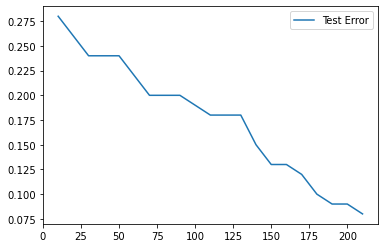

In [20]:
sns.lineplot(x=n_nums, y=plot_errors, label=str('Test Error'))